In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÌïòÍµ¨"
region_code = "12"
target_date = "2018-01-04"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÌïòÍµ¨2018_1q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2018-01-04   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7021    ÏÇ¨ÌïòÍµ¨   8175    ÏÇ¨ÌïòÍµ¨   
1   2018-01-04     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6390    ÏÇ¨ÌïòÍµ¨   6677    ÏÇ¨ÌïòÍµ¨   
2   2018-01-04     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2780    ÏÇ¨ÌïòÍµ¨   2990    ÏÇ¨ÌïòÍµ¨   
3   2018-01-04    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5909    ÏÇ¨ÌïòÍµ¨   5990    ÏÇ¨ÌïòÍµ¨   
4   2018-01-04     ÎåÄÌåå                      1.0„éè   3257    ÏÇ¨ÌïòÍµ¨   3750    ÏÇ¨ÌïòÍµ¨   
5   2018-01-04   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   8950    ÏÇ¨ÌïòÍµ¨   9450    ÏÇ¨ÌïòÍµ¨   
6   2018-01-04     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365    ÏÇ¨ÌïòÍµ¨   4410    ÏÇ¨ÌïòÍµ¨   
7   2018-01-04     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÏÇ¨ÌïòÍµ¨    678    ÏÇ¨ÌïòÍµ¨   
8   2018-01-04     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1420    ÏÇ¨ÌïòÍµ¨   1460    ÏÇ¨ÌïòÍµ¨   
9   2018-01-04      Î¨¥                   2.0„éè 1Í∞ú   1150    ÏÇ¨ÌïòÍµ¨   1280    ÏÇ¨ÌïòÍµ¨   
10  2018-01-04    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430    ÏÇ¨ÌïòÍµ¨   3990    ÏÇ¨ÌïòÍµ¨   
11  2018-01-04     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   2996    ÏÇ¨ÌïòÍµ¨   3966    ÏÇ¨ÌïòÍµ¨   
12  2018-01-04      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  19800    ÏÇ¨ÌïòÍµ¨  23000    ÏÇ¨ÌïòÍµ¨   
13  2018-01-04     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2500    ÏÇ¨ÌïòÍµ¨   2680    ÏÇ¨ÌïòÍµ¨   
14  2018-01-04  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   5989    ÏÇ¨ÌïòÍµ¨   6521    ÏÇ¨ÌïòÍµ¨   
15  2018-01-04   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13780    ÏÇ¨ÌïòÍµ¨  14900    ÏÇ¨ÌïòÍµ¨   
16  2018-01-04     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú   9983    ÏÇ¨ÌïòÍµ¨  13799    ÏÇ¨ÌïòÍµ¨   
17  2018-01-04    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1658    ÏÇ¨ÌïòÍµ¨   2316    ÏÇ¨ÌïòÍµ¨   
18  2018-01-04     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580    ÏÇ¨ÌïòÍµ¨   1990    ÏÇ¨ÌïòÍµ¨   
19  2018-01-04     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÏÇ¨ÌïòÍµ¨   1190    ÏÇ¨ÌïòÍµ¨   
20  2018-01-04    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  44950    ÏÇ¨ÌïòÍµ¨  46000    ÏÇ¨ÌïòÍµ¨   
21  2018-01-04    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950    ÏÇ¨ÌïòÍµ¨   7689    ÏÇ¨ÌïòÍµ¨   
22  2018-01-04      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  42800    ÏÇ¨ÌïòÍµ¨  49900    ÏÇ¨ÌïòÍµ¨   
23  2018-01-04     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2186    ÏÇ¨ÌïòÍµ¨   2660    ÏÇ¨ÌïòÍµ¨   
24  2018-01-04     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÏÇ¨ÌïòÍµ¨    730    ÏÇ¨ÌïòÍµ¨   
25  2018-01-04    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6990    ÏÇ¨ÌïòÍµ¨   7250    ÏÇ¨ÌïòÍµ¨   
26  2018-01-04   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2490    ÏÇ¨ÌïòÍµ¨   2600    ÏÇ¨ÌïòÍµ¨   
27  2018-01-04     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2590    ÏÇ¨ÌïòÍµ¨   2980    ÏÇ¨ÌïòÍµ¨   
28  2018-01-04    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  12040    ÏÇ¨ÌïòÍµ¨  16900    ÏÇ¨ÌïòÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0   1154  16.44%   7,598  
1    287   4.49%   6,534  
2    210   7.55%   2,885  
3     81   1.37%   5,950  
4    493  15.14%   3,504  
5    500   5.59%   9,200  
6     45   1.03%   4,388  
7      2    0.3%     677  
8     40   2.82%   1,440  
9    130   11.3%   1,215  
10   560  16.33%   3,710  
11   970  32.38%   3,481  
12  3200  16.16%  21,400  
13   180    7.2%   2,590  
14   532   8.88%   6,255  
15  1120   8.13%  14,340  
16  3816  38.22%  11,891  
17   658  39.69%   1,987  
18   410  25.95%   1,785  
19     0    0.0%   1,190  
20  1050   2.34%  45,475  
21   739  10.63%   7,320  
22  7100  16.59%  46,350  
23   474  21.68%   2,423  
24     0    0.0%     730  
25   260   3.72%   7,120  
26   110 

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÌïòÍµ¨"
region_code = "12"
target_date = "2018-04-05"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÌïòÍµ¨2018_2q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2018-04-05   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   6675    ÏÇ¨ÌïòÍµ¨   7490    ÏÇ¨ÌïòÍµ¨   
1   2018-04-05     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6390    ÏÇ¨ÌïòÍµ¨   6677    ÏÇ¨ÌïòÍµ¨   
2   2018-04-05    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   2714    ÏÇ¨ÌïòÍµ¨   4750    ÏÇ¨ÌïòÍµ¨   
3   2018-04-05     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2180    ÏÇ¨ÌïòÍµ¨   2590    ÏÇ¨ÌïòÍµ¨   
4   2018-04-05    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5909    ÏÇ¨ÌïòÍµ¨   6990    ÏÇ¨ÌïòÍµ¨   
5   2018-04-05     ÎåÄÌåå                      1.0„éè   2763    ÏÇ¨ÌïòÍµ¨   3000    ÏÇ¨ÌïòÍµ¨   
6   2018-04-05   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9250    ÏÇ¨ÌïòÍµ¨   9950    ÏÇ¨ÌïòÍµ¨   
7   2018-04-05     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365    ÏÇ¨ÌïòÍµ¨   4410    ÏÇ¨ÌïòÍµ¨   
8   2018-04-05     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÏÇ¨ÌïòÍµ¨    678    ÏÇ¨ÌïòÍµ¨   
9   2018-04-05     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1420    ÏÇ¨ÌïòÍµ¨   1460    ÏÇ¨ÌïòÍµ¨   
10  2018-04-05      Î¨¥                   2.0„éè 1Í∞ú   2680    ÏÇ¨ÌïòÍµ¨   3333    ÏÇ¨ÌïòÍµ¨   
11  2018-04-05    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3500    ÏÇ¨ÌïòÍµ¨   3990    ÏÇ¨ÌïòÍµ¨   
12  2018-04-05      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  16500    ÏÇ¨ÌïòÍµ¨  25500    ÏÇ¨ÌïòÍµ¨   
13  2018-04-05     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3980    ÏÇ¨ÌïòÍµ¨   3990    ÏÇ¨ÌïòÍµ¨   
14  2018-04-05  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   2990    ÏÇ¨ÌïòÍµ¨   6521    ÏÇ¨ÌïòÍµ¨   
15  2018-04-05   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  11000    ÏÇ¨ÌïòÍµ¨  14900    ÏÇ¨ÌïòÍµ¨   
16  2018-04-05     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  15800    ÏÇ¨ÌïòÍµ¨  15980    ÏÇ¨ÌïòÍµ¨   
17  2018-04-05    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1649    ÏÇ¨ÌïòÍµ¨   1658    ÏÇ¨ÌïòÍµ¨   
18  2018-04-05     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580    ÏÇ¨ÌïòÍµ¨   1990    ÏÇ¨ÌïòÍµ¨   
19  2018-04-05     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÏÇ¨ÌïòÍµ¨   1190    ÏÇ¨ÌïòÍµ¨   
20  2018-04-05    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  44950    ÏÇ¨ÌïòÍµ¨  49500    ÏÇ¨ÌïòÍµ¨   
21  2018-04-05    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950    ÏÇ¨ÌïòÍµ¨   7689    ÏÇ¨ÌïòÍµ¨   
22  2018-04-05      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  46800    ÏÇ¨ÌïòÍµ¨  55900    ÏÇ¨ÌïòÍµ¨   
23  2018-04-05     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1740    ÏÇ¨ÌïòÍµ¨   1993    ÏÇ¨ÌïòÍµ¨   
24  2018-04-05     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÏÇ¨ÌïòÍµ¨    730    ÏÇ¨ÌïòÍµ¨   
25  2018-04-05    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6990    ÏÇ¨ÌïòÍµ¨   7250    ÏÇ¨ÌïòÍµ¨   
26  2018-04-05   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2500    ÏÇ¨ÌïòÍµ¨   2600    ÏÇ¨ÌïòÍµ¨   
27  2018-04-05     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2190    ÏÇ¨ÌïòÍµ¨   2690    ÏÇ¨ÌïòÍµ¨   
28  2018-04-05    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  12040    ÏÇ¨ÌïòÍµ¨  15890    ÏÇ¨ÌïòÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    815   12.21%   7,083  
1    287    4.49%   6,534  
2   2036   75.02%   3,732  
3    410   18.81%   2,385  
4   1081   18.29%   6,450  
5    237    8.58%   2,882  
6    700    7.57%   9,600  
7     45    1.03%   4,388  
8      2     0.3%     677  
9     40    2.82%   1,440  
10   653   24.37%   3,007  
11   490    14.0%   3,745  
12  9000   54.55%  21,000  
13    10    0.25%   3,985  
14  3531  118.09%   4,756  
15  3900   35.45%  12,950  
16   180    1.14%  15,890  
17     9    0.55%   1,654  
18   410   25.95%   1,785  
19     0     0.0%   1,190  
20  4550   10.12%  47,225  
21   739   10.63%   7,320  
22  9100   19.44%  51,350  
23   253   14.54%   1,867  
24     0     0.0%     730  
25  

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÌïòÍµ¨"
region_code = "12"
target_date = "2018-07-05"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÌïòÍµ¨2018_3q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2018-07-05   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7959    ÏÇ¨ÌïòÍµ¨   8175    ÏÇ¨ÌïòÍµ¨   
1   2018-07-05     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6390    ÏÇ¨ÌïòÍµ¨   6677    ÏÇ¨ÌïòÍµ¨   
2   2018-07-05     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2380    ÏÇ¨ÌïòÍµ¨   2590    ÏÇ¨ÌïòÍµ¨   
3   2018-07-05    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5909    ÏÇ¨ÌïòÍµ¨   5990    ÏÇ¨ÌïòÍµ¨   
4   2018-07-05     ÎåÄÌåå                      1.0„éè   3597    ÏÇ¨ÌïòÍµ¨   3685    ÏÇ¨ÌïòÍµ¨   
5   2018-07-05   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9950    ÏÇ¨ÌïòÍµ¨   9950    ÏÇ¨ÌïòÍµ¨   
6   2018-07-05     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365    ÏÇ¨ÌïòÍµ¨   4410    ÏÇ¨ÌïòÍµ¨   
7   2018-07-05     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÏÇ¨ÌïòÍµ¨    678    ÏÇ¨ÌïòÍµ¨   
8   2018-07-05     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1420    ÏÇ¨ÌïòÍµ¨   1460    ÏÇ¨ÌïòÍµ¨   
9   2018-07-05      Î¨¥                   2.0„éè 1Í∞ú   1980    ÏÇ¨ÌïòÍµ¨   1990    ÏÇ¨ÌïòÍµ¨   
10  2018-07-05    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3500    ÏÇ¨ÌïòÍµ¨   3990    ÏÇ¨ÌïòÍµ¨   
11  2018-07-05     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   8990    ÏÇ¨ÌïòÍµ¨   9900    ÏÇ¨ÌïòÍµ¨   
12  2018-07-05      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  16500    ÏÇ¨ÌïòÍµ¨  23700    ÏÇ¨ÌïòÍµ¨   
13  2018-07-05     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2280    ÏÇ¨ÌïòÍµ¨   2990    ÏÇ¨ÌïòÍµ¨   
14  2018-07-05  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3290    ÏÇ¨ÌïòÍµ¨   6521    ÏÇ¨ÌïòÍµ¨   
15  2018-07-05   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13780    ÏÇ¨ÌïòÍµ¨  14290    ÏÇ¨ÌïòÍµ¨   
16  2018-07-05     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú   9900    ÏÇ¨ÌïòÍµ¨  15800    ÏÇ¨ÌïòÍµ¨   
17  2018-07-05    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1649    ÏÇ¨ÌïòÍµ¨   1658    ÏÇ¨ÌïòÍµ¨   
18  2018-07-05     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580    ÏÇ¨ÌïòÍµ¨   1990    ÏÇ¨ÌïòÍµ¨   
19  2018-07-05     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÏÇ¨ÌïòÍµ¨   1190    ÏÇ¨ÌïòÍµ¨   
20  2018-07-05    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   4950    ÏÇ¨ÌïòÍµ¨   7689    ÏÇ¨ÌïòÍµ¨   
21  2018-07-05      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  47500    ÏÇ¨ÌïòÍµ¨  55900    ÏÇ¨ÌïòÍµ¨   
22  2018-07-05     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1630    ÏÇ¨ÌïòÍµ¨   1993    ÏÇ¨ÌïòÍµ¨   
23  2018-07-05     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730    ÏÇ¨ÌïòÍµ¨    730    ÏÇ¨ÌïòÍµ¨   
24  2018-07-05    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7250    ÏÇ¨ÌïòÍµ¨   7250    ÏÇ¨ÌïòÍµ¨   
25  2018-07-05   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2500    ÏÇ¨ÌïòÍµ¨   2600    ÏÇ¨ÌïòÍµ¨   
26  2018-07-05     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2500    ÏÇ¨ÌïòÍµ¨   2690    ÏÇ¨ÌïòÍµ¨   
27  2018-07-05    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  12040    ÏÇ¨ÌïòÍµ¨  15890    ÏÇ¨ÌïòÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    216   2.71%   8,067  
1    287   4.49%   6,534  
2    210   8.82%   2,485  
3     81   1.37%   5,950  
4     88   2.45%   3,641  
5      0    0.0%   9,950  
6     45   1.03%   4,388  
7      2    0.3%     677  
8     40   2.82%   1,440  
9     10   0.51%   1,985  
10   490   14.0%   3,745  
11   910  10.12%   9,445  
12  7200  43.64%  20,100  
13   710  31.14%   2,635  
14  3231  98.21%   4,906  
15   510    3.7%  14,035  
16  5900   59.6%  12,850  
17     9   0.55%   1,654  
18   410  25.95%   1,785  
19     0    0.0%   1,190  
20  2739  55.33%   6,320  
21  8400  17.68%  51,700  
22   363  22.27%   1,812  
23     0    0.0%     730  
24     0    0.0%   7,250  
25   100    4.0%   2,550  
26   190    7.6%   2,595  
27  3850  31.98%  13,965

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÌïòÍµ¨"
region_code = "12"
target_date = "2018-10-11"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÌïòÍµ¨2018_4q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2018-10-11   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425    ÏÇ¨ÌïòÍµ¨   7959    ÏÇ¨ÌïòÍµ¨   
1   2018-10-11     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6390    ÏÇ¨ÌïòÍµ¨   6677    ÏÇ¨ÌïòÍµ¨   
2   2018-10-11    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   2444    ÏÇ¨ÌïòÍµ¨   3700    ÏÇ¨ÌïòÍµ¨   
3   2018-10-11     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2380    ÏÇ¨ÌïòÍµ¨   2990    ÏÇ¨ÌïòÍµ¨   
4   2018-10-11    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   6272    ÏÇ¨ÌïòÍµ¨   6590    ÏÇ¨ÌïòÍµ¨   
5   2018-10-11     ÎåÄÌåå                      1.0„éè   4569    ÏÇ¨ÌïòÍµ¨   7160    ÏÇ¨ÌïòÍµ¨   
6   2018-10-11   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9950    ÏÇ¨ÌïòÍµ¨   9950    ÏÇ¨ÌïòÍµ¨   
7   2018-10-11     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365    ÏÇ¨ÌïòÍµ¨   4410    ÏÇ¨ÌïòÍµ¨   
8   2018-10-11     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÏÇ¨ÌïòÍµ¨    678    ÏÇ¨ÌïòÍµ¨   
9   2018-10-11     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1420    ÏÇ¨ÌïòÍµ¨   1460    ÏÇ¨ÌïòÍµ¨   
10  2018-10-11      Î¨¥                   2.0„éè 1Í∞ú   2280    ÏÇ¨ÌïòÍµ¨   2990    ÏÇ¨ÌïòÍµ¨   
11  2018-10-11    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3500    ÏÇ¨ÌïòÍµ¨   3790    ÏÇ¨ÌïòÍµ¨   
12  2018-10-11     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   6055    ÏÇ¨ÌïòÍµ¨   6583    ÏÇ¨ÌïòÍµ¨   
13  2018-10-11      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  19800    ÏÇ¨ÌïòÍµ¨  23700    ÏÇ¨ÌïòÍµ¨   
14  2018-10-11     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3680    ÏÇ¨ÌïòÍµ¨   5990    ÏÇ¨ÌïòÍµ¨   
15  2018-10-11  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3495    ÏÇ¨ÌïòÍµ¨   3990    ÏÇ¨ÌïòÍµ¨   
16  2018-10-11   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13780    ÏÇ¨ÌïòÍµ¨  14290    ÏÇ¨ÌïòÍµ¨   
17  2018-10-11     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  12500    ÏÇ¨ÌïòÍµ¨  15800    ÏÇ¨ÌïòÍµ¨   
18  2018-10-11    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1649    ÏÇ¨ÌïòÍµ¨   1658    ÏÇ¨ÌïòÍµ¨   
19  2018-10-11     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580    ÏÇ¨ÌïòÍµ¨   1990    ÏÇ¨ÌïòÍµ¨   
20  2018-10-11     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÏÇ¨ÌïòÍµ¨   1190    ÏÇ¨ÌïòÍµ¨   
21  2018-10-11    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  44500    ÏÇ¨ÌïòÍµ¨  54900    ÏÇ¨ÌïòÍµ¨   
22  2018-10-11    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950    ÏÇ¨ÌïòÍµ¨   7689    ÏÇ¨ÌïòÍµ¨   
23  2018-10-11      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  53800    ÏÇ¨ÌïòÍµ¨  59900    ÏÇ¨ÌïòÍµ¨   
24  2018-10-11     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1600    ÏÇ¨ÌïòÍµ¨   1993    ÏÇ¨ÌïòÍµ¨   
25  2018-10-11     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796    ÏÇ¨ÌïòÍµ¨    796    ÏÇ¨ÌïòÍµ¨   
26  2018-10-11    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7250    ÏÇ¨ÌïòÍµ¨   7250    ÏÇ¨ÌïòÍµ¨   
27  2018-10-11   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2500    ÏÇ¨ÌïòÍµ¨   2600    ÏÇ¨ÌïòÍµ¨   
28  2018-10-11     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2500    ÏÇ¨ÌïòÍµ¨   2690    ÏÇ¨ÌïòÍµ¨   
29  2018-10-11    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  12040    ÏÇ¨ÌïòÍµ¨  15890    ÏÇ¨ÌïòÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0     534   7.19%   7,692  
1     287   4.49%   6,534  
2    1256  51.39%   3,072  
3     610  25.63%   2,685  
4     318   5.07%   6,431  
5    2591  56.71%   5,865  
6       0    0.0%   9,950  
7      45   1.03%   4,388  
8       2    0.3%     677  
9      40   2.82%   1,440  
10    710  31.14%   2,635  
11    290   8.29%   3,645  
12    528   8.72%   6,319  
13   3900   19.7%  21,750  
14   2310  62.77%   4,835  
15    495  14.16%   3,743  
16    510    3.7%  14,035  
17   3300   26.4%  14,150  
18      9   0.55%   1,654  
19    410  25.95%   1,785  
20      0    0.0%   1,190  
21  10400  23.3

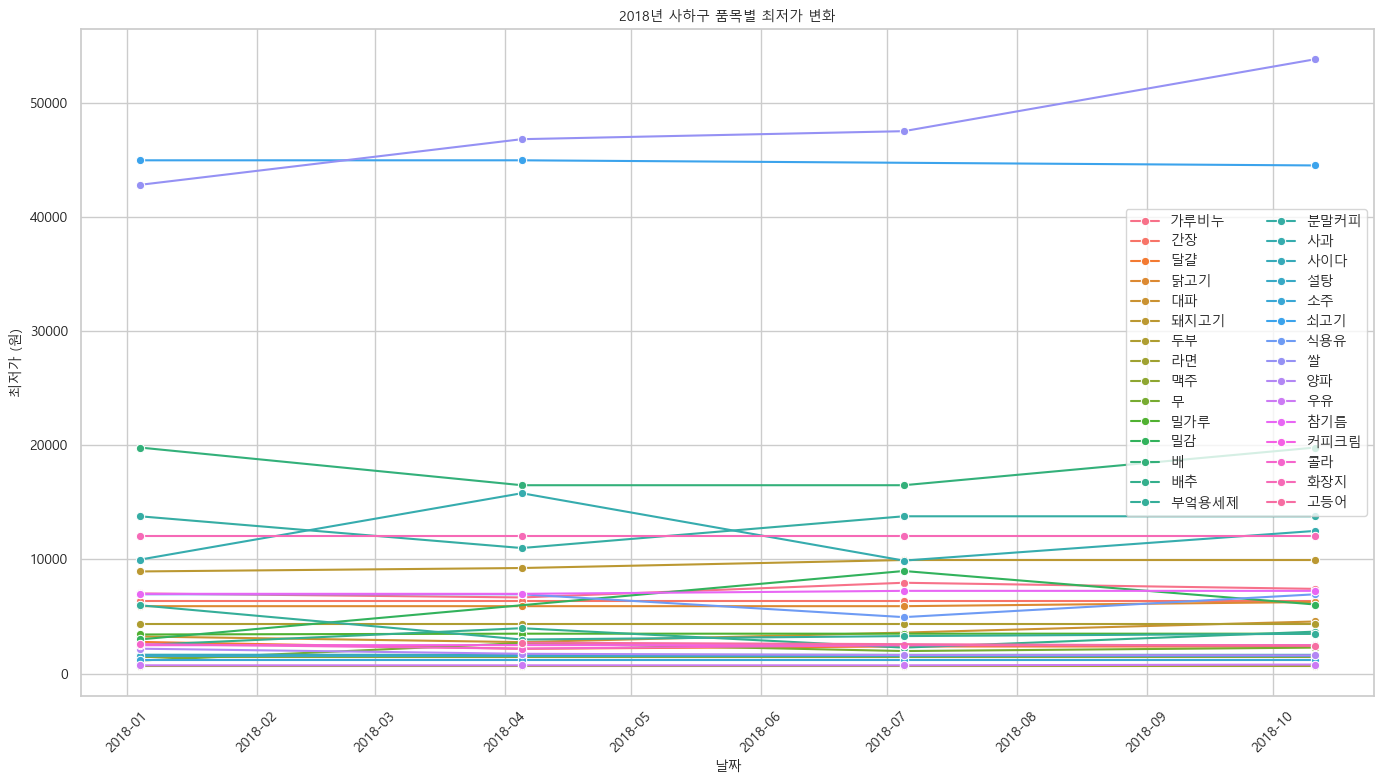

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÏÇ¨ÌïòÍµ¨2018_1q.csv")
q2 = pd.read_csv("ÏÇ¨ÌïòÍµ¨2018_2q.csv")
q3 = pd.read_csv("ÏÇ¨ÌïòÍµ¨2018_3q.csv")
q4 = pd.read_csv("ÏÇ¨ÌïòÍµ¨2018_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2018ÎÖÑ ÏÇ¨ÌïòÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÏÇ¨ÌïòÍµ¨2018_min.csv", index=False, encoding="utf-8-sig")

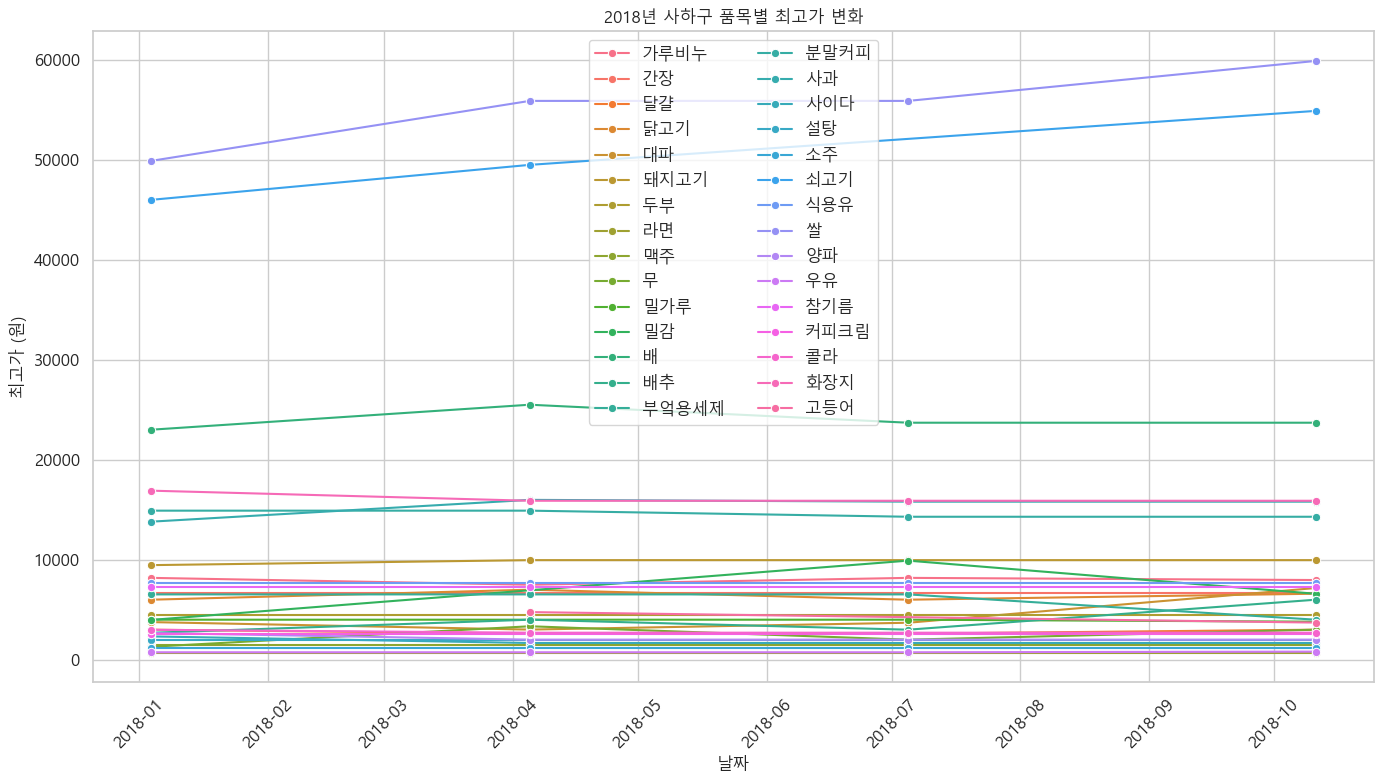

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÏÇ¨ÌïòÍµ¨2018_1q.csv")
q2 = pd.read_csv("ÏÇ¨ÌïòÍµ¨2018_2q.csv")
q3 = pd.read_csv("ÏÇ¨ÌïòÍµ¨2018_3q.csv")
q4 = pd.read_csv("ÏÇ¨ÌïòÍµ¨2018_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2018ÎÖÑ ÏÇ¨ÌïòÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÏÇ¨ÌïòÍµ¨2018_max.csv", index=False, encoding="utf-8-sig")